# **Overview**

## **Introduction** 

Stroke, also known as transient ischemic attack or cerebrovascular accident, happens when blood flow to the brain is blocked.This prevents the brain from getting oxygen and nutrients from the blood. Without oxygen and nutrients, brain cells begin to die within minutes. Sudden bleeding in the brain can also cause a stroke if it damages brain cells. It is a leading cause of death in the United States and is a major cause of serious disability for adults accordong to the CDC website. It can be preventable and treatable. 

This dataset will help us analyze whether at which age a patient is likely to get stroke based on the input parameters like gender, age, various dieases, and smoking staus. 

The data was published in Kaggle and it can be download via this link https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

## **Data Explanation**



*   **id**: unique identifier
*   **gender**: "Male", "Female" or "Other"

*   **age**: age of the patient
*   **hypertension:** 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

*   **heart_disease:** 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease
*   **ever_married:** "No" or "Yes"

*  **work_type:** "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"
*   **Residence_type:** "Rural" or "Urban"

*   **avg_glucose_level:** average glucose level in blood
*   **bmi:** body mass index

*   **smoking_status:** "formerly smoked", "never smoked", "smokes" or "Unknown"*
*   **stroke:** 1 if the patient had a stroke or 0 if not



*Note: "Unknown" in smoking_status means that the information is unavailable for this patient












**Importing Data From Kaggle**

1.   Kaggle API was downloaded
2.   Mount to Google Drive

The Kaggle API was downloaded in the Google drive and Google drive was connected to Colab



In [ ]:
!pip install kaggle #after downloading the API , install Kaggle library

In [ ]:
! mkdir ~/.kaggle #Make a directory named “.kaggle”

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json # Copy the “kaggle.json” into this new directory

In [ ]:
! kaggle datasets download -d fedesoriano/stroke-prediction-dataset #Downloading Dataset

stroke-prediction-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip stroke-prediction-dataset #unzip the file

Archive:  stroke-prediction-dataset.zip
replace healthcare-dataset-stroke-data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


**Importing Packages**

In [ ]:
!pip install umap-learn[plot]
!pip install holoviews
!pip install -U ipykernel

In [ ]:
pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import eig
from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
import plotly.express as px
%matplotlib inline
import seaborn as sns; sns.set()

from scipy.stats import pearsonr
from sklearn.manifold import TSNE
import umap
import umap.plot
import time

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
import sklearn
sklearn.__version__

'1.2.2'

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV 
from sklearn import metrics                        
from sklearn.metrics import accuracy_score         
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from xgboost import XGBClassifier
import collections
from collections import Counter
import imblearn
from imblearn.over_sampling import SMOTE

**Load** **the** **Data**

In [ ]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
for col in df.columns:
    df.rename(columns={col:col.replace(" ", "")},inplace=True)


df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


## **Data** **Exploration**

Deleting the case with gender = 'other' 
It is not needed for the analysis

In [ ]:
print(df.shape)

df2 = df.drop(df[df['gender'] == 'Other'].index)

print(df2.shape)

(5110, 12)
(5109, 12)


The value 'children' in this variable is redundant since 'age' is already present in the dataset



In [ ]:
# Distribution of 'age in those cases with the value 'children' in the variable'work_type'

child = df2[df2['work_type'] == 'children']

child['age'].describe()

count    687.000000
mean       6.841339
std        4.533364
min        0.080000
25%        2.000000
50%        6.000000
75%       11.000000
max       16.000000
Name: age, dtype: float64

In [ ]:
child2 = df2[df2['age'] <= 16]
print(child2.shape)
child2['work_type'].value_counts() #Next, we check if all children =< 16 years have the value 'children' assigned

(796, 12)


children         687
Private           85
Never_worked      12
Self-employed      9
Govt_job           3
Name: work_type, dtype: int64

In [ ]:
print(df2['work_type'].value_counts())

df2['work_type'] = df2['work_type'].replace(['children'], 'Never_worked')

print("\n")

print(df2['work_type'].value_counts())

Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Private          2924
Self-employed     819
Never_worked      709
Govt_job          657
Name: work_type, dtype: int64


Delete the cases with missing value in 'bmi

In [ ]:
print(df2.shape)

df3 = df2.drop(df2[df2['bmi'].isna()].index)

print(df3.shape)

(5109, 12)
(4908, 12)


Imputation and deletion of cases with value 'Unknown" in the variable 'smoking_status'

In [ ]:
df2[(df2['smoking_status'] == 'Unknown') & (df2['stroke'] == 1) & (df2['age'] > 10)].shape

(46, 12)

In [ ]:
# How many cases contain the value 'Unknown'?

print(df3[df3['smoking_status'] == 'Unknown'].shape)

# How many correspond to children below 10 years

print(df3[(df3['smoking_status'] == 'Unknown') & (df3['age'] <= 10)].shape)

# Imputation of those cases with value'Unknown' to 'Never smoked'

print(df3['smoking_status'].value_counts())

df3.loc[((df3['smoking_status'] == 'Unknown') & (df3['age'] <= 10)),
        'smoking_status'] = 'never smoked'

print("\n")
print(df3['smoking_status'].value_counts())

# Deletion of the rest of cases with 'Unknown' value

print(df3.shape)

df4 = df3.drop(df3[df3['smoking_status'] == 'Unknown'].index)

print(df4.shape)

(1483, 12)
(484, 12)
never smoked       1852
Unknown            1483
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64


never smoked       2336
Unknown             999
formerly smoked     836
smokes              737
Name: smoking_status, dtype: int64
(4908, 12)
(3909, 12)


**Data** **Transformation**

In [ ]:
# Total population

df_tot = df4.copy()
print(df_tot.shape)

# Adults only (> 18)

df_adult = df4[df4['age'] > 18]
print(df_adult.shape)

# Excluding abnormal values in 'bmi' (as per NIH standard values, see section 7)

df_bmi = df4[df4['bmi'] <= 54]
print(df_bmi.shape)

(3909, 12)
(3223, 12)
(3874, 12)


In [ ]:
# Identification of categorical variables

cat = [
    'gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'
]

# Binarization 

df_tot2 = pd.get_dummies(df_tot, columns=cat)
df_adult2 = pd.get_dummies(df_adult, columns=cat)
df_bmi2 = pd.get_dummies(df_bmi, columns=cat)

for col in df_tot2.columns:
    print(col)

# Deletion of extra variables (extra level generated in variables with only 2 possible values)

df_tot3 = df_tot2.drop(
    ['gender_Male', 'ever_married_No', 'Residence_type_Urban'], axis=1)
df_adult3 = df_adult2.drop(
    ['gender_Male', 'ever_married_No', 'Residence_type_Urban'], axis=1)
df_bmi3 = df_bmi2.drop(
    ['gender_Male', 'ever_married_No', 'Residence_type_Urban'], axis=1)

print("\n")
for col in df_tot3.columns:
    print(col)

# Check whether all variables are numerical

df_tot3.dtypes

id
age
hypertension
heart_disease
avg_glucose_level
bmi
stroke
gender_Female
gender_Male
ever_married_No
ever_married_Yes
work_type_Govt_job
work_type_Never_worked
work_type_Private
work_type_Self-employed
Residence_type_Rural
Residence_type_Urban
smoking_status_formerly smoked
smoking_status_never smoked
smoking_status_smokes


id
age
hypertension
heart_disease
avg_glucose_level
bmi
stroke
gender_Female
ever_married_Yes
work_type_Govt_job
work_type_Never_worked
work_type_Private
work_type_Self-employed
Residence_type_Rural
smoking_status_formerly smoked
smoking_status_never smoked
smoking_status_smokes


id                                  int64
age                               float64
hypertension                        int64
heart_disease                       int64
avg_glucose_level                 float64
bmi                               float64
stroke                              int64
gender_Female                       uint8
ever_married_Yes                    uint8
work_type_Govt_job                  uint8
work_type_Never_worked              uint8
work_type_Private                   uint8
work_type_Self-employed             uint8
Residence_type_Rural                uint8
smoking_status_formerly smoked      uint8
smoking_status_never smoked         uint8
smoking_status_smokes               uint8
dtype: object

Deletion of variable 'id

In [ ]:
print(df_tot3.shape)

df_tot4 = df_tot3.drop('id', axis=1)
df_adult4 = df_adult3.drop('id', axis=1)
df_bmi4 = df_bmi3.drop('id', axis=1)

print(df_tot4.shape)

for col in df_tot4.columns:
    print(col)

print(df_tot4.head())

# Indexing reset

df_tot4 = df_tot4.reset_index(drop=True)
df_adult4 = df_adult4.reset_index(drop=True)
df_bmi4 = df_bmi4.reset_index(drop=True)

(3909, 17)
(3909, 16)
age
hypertension
heart_disease
avg_glucose_level
bmi
stroke
gender_Female
ever_married_Yes
work_type_Govt_job
work_type_Never_worked
work_type_Private
work_type_Self-employed
Residence_type_Rural
smoking_status_formerly smoked
smoking_status_never smoked
smoking_status_smokes
    age  hypertension  heart_disease  avg_glucose_level   bmi  stroke  \
0  67.0             0              1             228.69  36.6       1   
2  80.0             0              1             105.92  32.5       1   
3  49.0             0              0             171.23  34.4       1   
4  79.0             1              0             174.12  24.0       1   
5  81.0             0              0             186.21  29.0       1   

   gender_Female  ever_married_Yes  work_type_Govt_job  \
0              0                 1                   0   
2              0                 1                   0   
3              1                 1                   0   
4              1              

# **Dimensionality** **Reduction** **Techniques**

When there is a high number of dataset , it usually take quite amount of time to perform meanigful analzysis which can lead to time and money loss. This is when dimensionality reduction technique come in , it reduces the number of features in dataset without losing the dataset information. This dataset will be analyse with different reduction techniques and at the end eveluate the best performing one.

## **Dimensionality** **reduction** **with** **PCA**

PCA ( Principal Component Analysis) will be used to extract a new set of variables from this large dataset , the new extractions are called the principal components.

Let's analyse which is the optimal number of components to reduce the dimensionality

In [ ]:
# Transformation of data: normalization and PCA

X = df_tot4.loc[:, df_tot4.columns != 'stroke']

pca_pipe = make_pipeline(StandardScaler(), PCA())
pca_pipe.fit_transform(X)

modelo_pca = pca_pipe.named_steps['pca']

# Extraction of number of components

print(modelo_pca.n_components_)

# Extraction of the explained variance of each component

print(modelo_pca.explained_variance_ratio_)

15
[2.22463743e-01 1.13603820e-01 9.63816651e-02 8.41763384e-02
 7.92250837e-02 7.62608662e-02 6.64035739e-02 5.98155333e-02
 5.90169302e-02 5.46752621e-02 4.43595958e-02 2.82607648e-02
 1.53568227e-02 5.99893123e-33 4.13880320e-33]


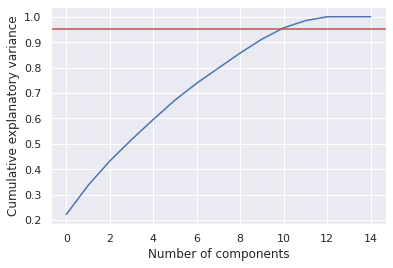

In [ ]:
# Creation of a graph showing the cumulative explained variance along the components and a target line of 95%

cumsum = np.cumsum(modelo_pca.explained_variance_ratio_)
plt.plot(cumsum)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explanatory variance')
plt.axhline(y=0.95, color='r', linestyle='-')

In [ ]:
# Extraction of the matrix with the relative weight of each variable in each principal component

pd.DataFrame(data=modelo_pca.components_,
             columns=X.columns,
             index=[list(range(1, 16))])

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Rural,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1,-4.584159e-01,-1.757048e-01,-1.407805e-01,-1.659889e-01,-3.238355e-01,-1.656834e-02,-4.141990e-01,-0.065910,0.449832,-0.167718,-0.143050,1.271983e-03,-0.233376,0.318297,-0.154407
2,1.562973e-01,1.709015e-01,1.112041e-01,1.568037e-01,-6.936024e-02,-5.598818e-02,5.735819e-02,0.293780,0.139183,-0.669473,0.500099,-1.029669e-02,0.094105,0.129878,-0.261482
3,-1.493016e-01,-2.042519e-01,-7.738518e-03,-1.646831e-01,-1.914165e-01,-1.783872e-01,-1.508653e-01,0.128261,0.155663,-0.222142,0.033028,-9.619622e-02,0.373529,-0.639707,0.410445
4,-1.842471e-03,-5.164833e-02,-1.706271e-01,-1.266345e-01,1.142201e-01,2.156849e-01,1.012144e-01,0.538797,-0.133537,-0.201586,-0.095651,-6.051648e-02,-0.539123,0.072549,0.474204
5,-1.242807e-02,3.157346e-01,4.654297e-01,3.640813e-01,-5.715073e-02,-4.107312e-01,-1.141889e-01,-0.212296,0.157495,0.018705,0.019378,-5.071512e-02,-0.370724,-0.004395,0.394138
6,-3.837105e-02,7.592494e-02,1.605019e-01,2.064302e-01,7.620745e-02,-3.230706e-01,-2.529073e-02,0.570741,0.038615,0.036486,-0.610686,7.495048e-02,0.205186,0.029396,-0.251950
7,-3.546517e-02,-1.424425e-02,-9.350270e-02,2.191650e-02,2.728965e-02,-7.510132e-02,-2.349474e-02,-0.012022,-0.005449,-0.043673,0.075173,9.792213e-01,-0.034052,-0.056688,0.106767
8,1.830461e-01,-4.786116e-01,5.555006e-01,-4.579466e-01,-2.359340e-01,-2.274668e-01,1.951751e-01,0.049950,-0.148724,0.034503,0.049674,6.698587e-02,-0.112714,0.151628,-0.071942
9,2.327111e-03,1.168084e-01,5.139886e-01,1.057066e-01,-2.283713e-01,7.581707e-01,-1.312341e-01,0.061656,0.086562,0.005250,-0.146473,1.167185e-01,0.094760,-0.102706,0.029428
10,3.755398e-02,7.282558e-01,-2.241522e-03,-6.641430e-01,-1.130257e-01,-7.900954e-02,-1.094275e-02,0.025138,0.000159,0.028715,-0.061993,3.189430e-02,0.034274,-0.015398,-0.016625


In [ ]:
pca_components = pca_pipe.fit_transform(X)

In [ ]:
pca_components

array([[-3.05316741e+00,  2.11868797e-01,  4.29714494e-01, ...,
        -2.15654287e-01,  1.27727458e-14,  2.47270792e-16],
       [-1.47938618e+00, -6.92730670e-02, -1.52176978e+00, ...,
         5.31510041e-01,  1.53083521e-16, -7.30727491e-16],
       [-1.62430879e+00, -1.59723383e+00,  6.17426228e-01, ...,
         3.76433415e-02,  5.80254721e-15, -2.31602521e-15],
       ...,
       [-1.33554517e+00,  2.05772822e+00, -1.37775135e+00, ...,
         7.85131466e-01,  1.06027826e-16, -1.03885153e-16],
       [ 1.27786956e-01,  1.66066944e+00, -8.90040800e-01, ...,
        -8.67028348e-01,  2.31989010e-16, -1.96256746e-16],
       [-1.42366697e+00, -5.31869013e-01,  8.67590968e-01, ...,
        -2.68916103e-01, -2.21437800e-16, -2.41088859e-16]])

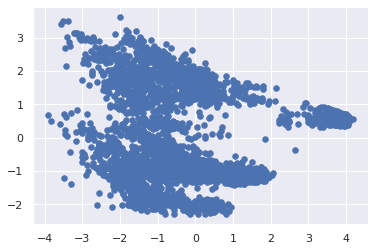

In [ ]:
plt.scatter(pca_components[ : , 0], pca_components[ : , 1], s =30);

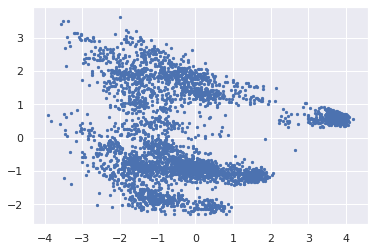

In [ ]:
plt.scatter(pca_components[ : , 0], pca_components[ : , 1], s =5);

As per the results of previous section, up to 10 principal components are needed to reach the 95% explained variance. A compromise between not adding many components to the model but enough to explain the most part of the variance is needed

## **Dimensionality** **reduction** **with** **t-SNE**

t- Distributed Stochastic Neighbor Embedding (t-SNE) ,is a nonlinear method that minimizes the divergence between the distributions of the high-dimensional data and the low-dimensional representation that it produces. 

In [ ]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 3909 samples in 0.011s...
[t-SNE] Computed neighbors for 3909 samples in 0.203s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3909
[t-SNE] Computed conditional probabilities for sample 2000 / 3909
[t-SNE] Computed conditional probabilities for sample 3000 / 3909
[t-SNE] Computed conditional probabilities for sample 3909 / 3909
[t-SNE] Mean sigma: 4.242070
[t-SNE] KL divergence after 250 iterations with early exaggeration: 65.871216
[t-SNE] KL divergence after 300 iterations: 1.657365


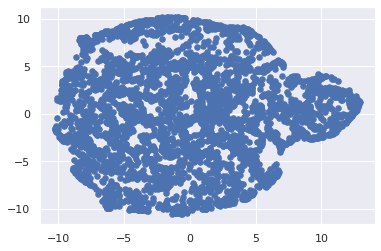

In [ ]:
plt.scatter(tsne_results[ : , 0], tsne_results[ : , 1], s =30);

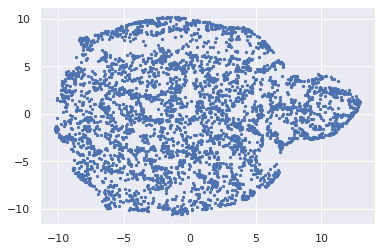

In [ ]:
plt.scatter(tsne_results[ : , 0], tsne_results[ : , 1], s =5)

In [ ]:
# decreasing perplexity
tsne2 = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=300)
tsne_results2 = tsne2.fit_transform(X)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 3909 samples in 0.016s...
[t-SNE] Computed neighbors for 3909 samples in 0.160s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3909
[t-SNE] Computed conditional probabilities for sample 2000 / 3909
[t-SNE] Computed conditional probabilities for sample 3000 / 3909
[t-SNE] Computed conditional probabilities for sample 3909 / 3909
[t-SNE] Mean sigma: 3.795388
[t-SNE] KL divergence after 250 iterations with early exaggeration: 67.538452
[t-SNE] KL divergence after 300 iterations: 1.838353


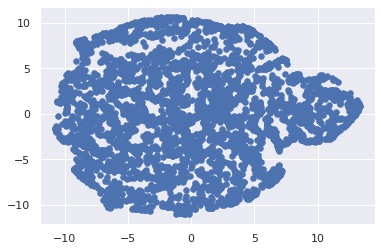

In [ ]:
plt.scatter(tsne_results2[ : , 0], tsne_results2[ : , 1], s =30);

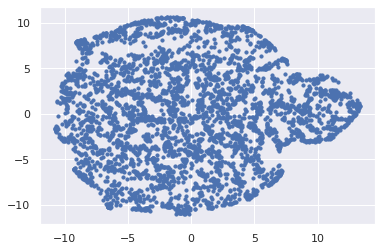

In [ ]:
plt.scatter(tsne_results2[ : , 0], tsne_results2[ : , 1], s =10);

In [ ]:
# increasing perplexity
tsne3 = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results3 = tsne3.fit_transform(X)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 3909 samples in 0.017s...
[t-SNE] Computed neighbors for 3909 samples in 0.228s...
[t-SNE] Computed conditional probabilities for sample 1000 / 3909
[t-SNE] Computed conditional probabilities for sample 2000 / 3909
[t-SNE] Computed conditional probabilities for sample 3000 / 3909
[t-SNE] Computed conditional probabilities for sample 3909 / 3909
[t-SNE] Mean sigma: 4.628901
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.565666
[t-SNE] KL divergence after 300 iterations: 1.519513


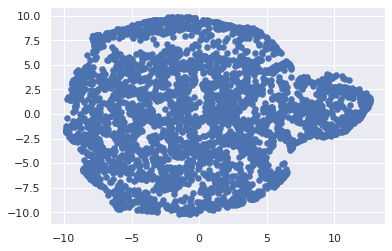

In [ ]:
plt.scatter(tsne_results3[ : , 0], tsne_results3[ : , 1], s =30);

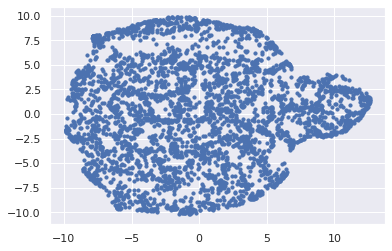

In [ ]:
plt.scatter(tsne_results3[ : , 0], tsne_results3[ : , 1], s =10);

T-SNE and  PCA can't seperate dataset very well, comparing to UMAP 

## **Dimensionality** **reduction** **with** **UMAP**

This technique works well for high dimensional data. Its run-time is shorter as compared to t-SNE

In [ ]:
time_start = time.time()
umap_results = umap.UMAP(n_neighbors=5,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 42.45884418487549 seconds


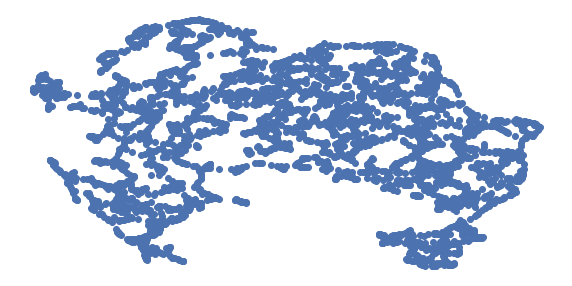

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results[:, 0], umap_results[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
# decreasing neighbors
umap_results2 = umap.UMAP(n_neighbors=3,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 210.88461017608643 seconds


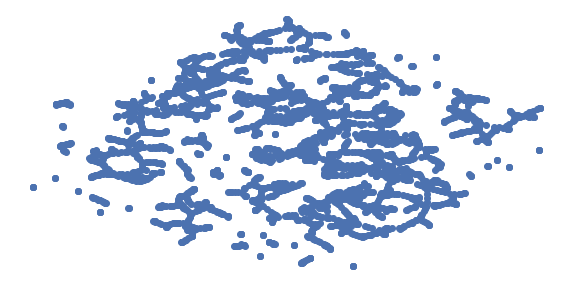

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results2[:, 0], umap_results2[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
# increasing neighbors
umap_results3 = umap.UMAP(n_neighbors=10,
                         min_dist=0.3,
                         metric='correlation').fit_transform(X)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 335.8546190261841 seconds


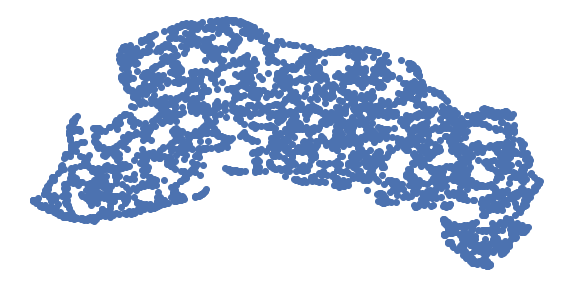

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results3[:, 0], umap_results3[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
# increasing min dist
umap_results4 = umap.UMAP(n_neighbors=3,
                         min_dist=0.5,
                         metric='correlation').fit_transform(X)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 552.2481679916382 seconds


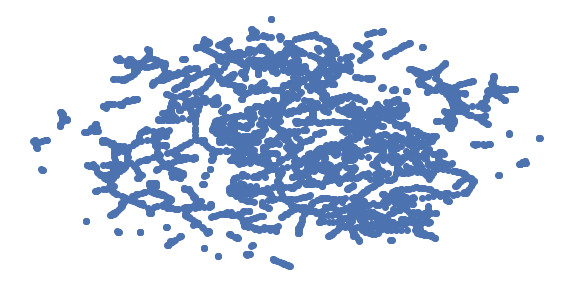

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results4[:, 0], umap_results4[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
# decreasing min dist
umap_results5 = umap.UMAP(n_neighbors=3,
                         min_dist=0.1,
                         metric='correlation').fit_transform(X)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 1269.0855224132538 seconds


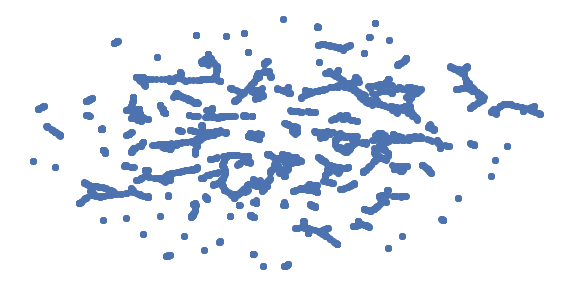

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results5[:, 0], umap_results5[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

In [ ]:
# decreasing neighbors
umap_results6 = umap.UMAP(n_neighbors=2,
                         min_dist=0.1,
                         metric='correlation').fit_transform(X)
print('UMAP done! Time elapsed: {} seconds'.format(time.time()-time_start))

UMAP done! Time elapsed: 2192.980881690979 seconds


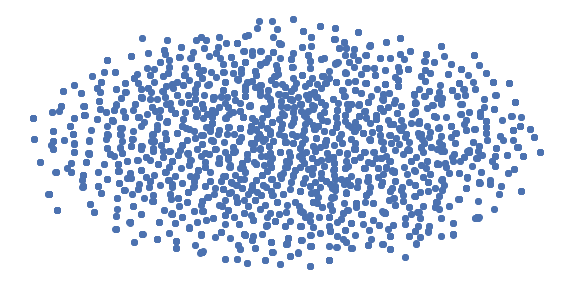

In [ ]:
plt.figure(figsize=(10,5))
plt.scatter(umap_results6[:, 0], umap_results6[:, 1])
plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

UMAP doesn't have discernable clusters but it is better to use this one comparing to PCA and T-SNE while preserving the global structure of the data

# **Clustering** **Techniques** 

## **K-Means** 

In [ ]:
# standardizing data
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

In [ ]:
labels1 = KMeans(n_clusters=2, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels1, metric='euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.17088739453710242


In [ ]:
labels2 = KMeans(n_clusters=3, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels2, metric='euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.21712601198909146


In [ ]:
labels3 = KMeans(n_clusters=4, random_state=123).fit_predict(X_std)
print(metrics.silhouette_score(X_std, labels3, metric='euclidean'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.24441983552940316


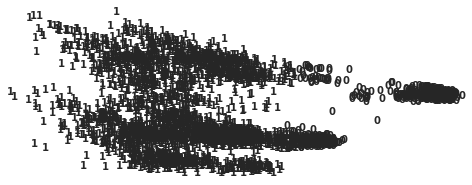

In [ ]:
# visualizing k-means with 2 clusters
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(1,.5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(labels1[i]),
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

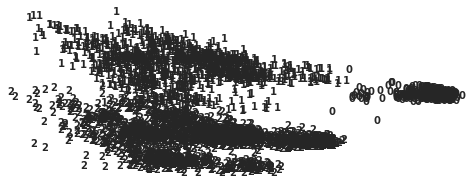

In [ ]:

# visualizing k-means with 3 clusters
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(1,.5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(labels2[i]),
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

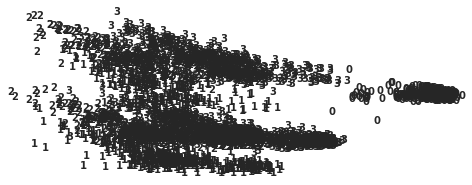

In [ ]:
# visualizing k-means with 4 clusters
pca = PCA(n_components=2).fit_transform(X_std)

plt.figure(figsize=(1,.5))
colours = 'rbg'
for i in range(pca.shape[0]):
    plt.text(pca[i, 0], pca[i, 1], str(labels3[i]),
             fontdict={'weight': 'bold', 'size': 10}
        )

plt.xticks([])
plt.yticks([])
plt.axis('off')
plt.show()

## **DBSCAN**

In [ ]:
#DBSCAN model
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps = 2, min_samples = 5)
dbscan.fit(X)

clusters_dbscan = dbscan.labels_
clusters_dbscan
#DBSCAN is not suitable for this dataset as we cannot retrict the number of clusters to 2 (since we are working with labelled data); here it generated 3 classes - 0,1,2

array([-1, -1, -1, ..., -1, -1, -1])

DBSCAN is not suitable for this dataset as we cannot retrict the number of clusters to 2 (since we are working with labelled data); here it generated 3 classes - 0,1,2

## **Gaussian** **mixture** **models**

In [ ]:
df=df.dropna()
df = df.sample(frac = 1)

#Train Data
x=df[["bmi","avg_glucose_level"]]

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

In [ ]:
#Fitting the data to the pre-built GMM Model
GMM = GaussianMixture(n_components=2, random_state=0).fit(x)

#Centroids of the Clusters
centroids=GMM.means_

#Evaluation
prediction_label = GMM.fit_predict(x)

In [ ]:
#Fitting the data to the pre-built GMM Model
GMM = GaussianMixture(n_components=2, random_state=0).fit(x)

#Centroids of the Clusters
centroids=GMM.means_

#Evaluation
prediction_label = GMM.fit_predict(x)

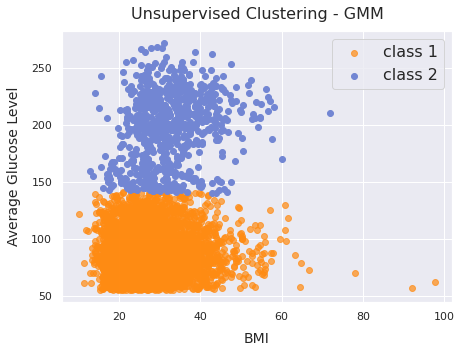

In [ ]:
#Visualization
class_1 = x[prediction_label == 0]
class_2 = x[prediction_label == 1]
fig = plt.figure(figsize = (7,5))
plt.scatter(class_1["bmi"], class_1["avg_glucose_level"], color = '#FF8B13', label="class 1", alpha=0.7)
plt.scatter(class_2["bmi"], class_2["avg_glucose_level"], color = '#7286D3', label="class 2")
plt.title("Unsupervised Clustering - GMM", fontsize='16', y=1.02)
plt.xlabel("BMI", fontsize='14', labelpad=10)
plt.ylabel("Average Glucose Level", fontsize='14',labelpad=10)
plt.legend(prop={"size":16})
plt.show()

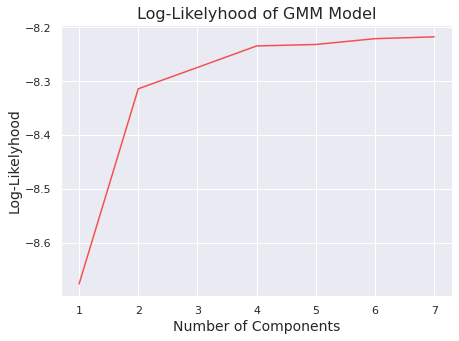

In [ ]:
#Calculating log-likelyhood
n_components_range = range(1, 8)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(x) for n in n_components_range]
log_likelihoods = [model.score(x) for model in models]

# Plot the log-likelyhood graph
fig = plt.figure(figsize = (7,5))
plt.plot(n_components_range, log_likelihoods, color="#F55050")
plt.xlabel('Number of Components', fontsize='14')
plt.ylabel('Log-Likelyhood', fontsize='14')
plt.title('Log-Likelyhood of GMM Model', fontsize='16')
plt.show()

In [ ]:
silhouette_score(x, prediction_label)

0.7326324767198332

Silhouette score Commonly used for unsupervised clustering, Silhouette Score has range of [-1,1] where -1 represents that the clusters defined and 1 repersents well defined clusters. Ideally, Silhouette Score > 0.5 is prefered. Our Gaussian mixture modles has a score ~0.73 which is an excellent value indicating our model is accurate.

# **Conclusion**

For the analysis of data dimensionality reduction techniques and clustering techniques were used. Throughout the analysis, it was determined that dimensionality reduction with UMAP was more suitable for our dataset because it gave a clear visual of the clusters compared to the others, t-SNE and PCA. 
Clustering techniques used for this analysis were K-means, DBSCAN, and Gaussian Mixture models. It was determined that the Gaussian mixture model is best suitable for this dataset because of the silhouette score being approximately 0.73 which determines that the model is accurate.
Dimensionality reduction helped with data visualization and reduced the dimensions of the data to have a useful algorithm. Clustering helped with the organizing of data into clusters to gain insights and make data predictions.


In conclusion, If a patient has hypertension, it is more possible he/she will have a stroke (15% compared to 4% in the dataset). Smoking is not related to high glucose levels and the average age of a patient potentially getting a stroke is around 50 and up based on this dataset.

